In [1]:
import os
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import networkx as nx
import nxutils as nxu
from dataclasses import asdict
from rich import print
from rich.tree import Tree
from rich.errors import NotRenderableError
from tbdoist import td_iter_to_graph, td_diGraph_to_richTree
import tbdoist as tbd
from modify import manage_supertask_link, manage_supertask_links


from todoist_api_python.api import TodoistAPI
from todoist_api_python.models import Section

In [2]:
tdapi = TodoistAPI(os.getenv("TODOIST_API_KEY"))

In [3]:
get_funcs = {"projects": tdapi.get_projects,
          "sections": tdapi.get_sections,
          "tasks": tdapi.get_tasks}
results = {}
for func in get_funcs:
    results[func] = get_funcs[func]()

In [4]:
tdg = nx.DiGraph(name="Todoist")
for kind in results:
    td_iter_to_graph(results[kind], g=tdg)
    #for obj in results[iter]:
    #    print(obj, type(obj))

In [5]:
tdg.graph

{'name': 'Todoist'}

In [6]:
sg = nx.subgraph_view(tdg, filter_edge=tbd.td_g_filter_factory(tdg))
t = td_diGraph_to_richTree(tdg)

In [7]:
print(t)

Todoist
├── Inbox
│   ├── Sorted
│   │   └── Test3
│   └── Test1
│       └── Subtest1
├── Main Work =
│   ├── Self
│   │   ├── Life Management Project
│   │   │   ├── Online Home for Posting.
│   │   │   │   └── Buy domain name.
│   │   │   └── Roadmap for time river
│   │   │       ├── LIfe Management Planning Phase
│   │   │       │   ├── Dataflow Sketch
│   │   │       │   │   └── Connections between Neorg and Todoist.
│   │   │       │   └── Write down how Data will be held in Neorg.
│   │   │       ├── automate adding links to shows to send shows e-mail.
│   │   │       ├── Create a `Todoist-convert` module
│   │   │       ├── Todoist features module
│   │   │       │   ├── Links to other tasks may require autocomplete?
│   │   │       │   └── Tasks are schedules for a time between them and another task.
│   │   │       └── create networkx network of all projects and tasks names only (shouldn't require convert yet.)
│   │   ├── EDGES
│   │   │   ├── Make repo of Plot Code.
│   │   │   ├── Prep standards document for putting data on Zenodo.
│   │   │   ├── Gather data on github workflow for teams.
│   │   │   ├── Distance Data plot 3d
│   │   │   ├── Distance Data plot color.
│   │   │   └── Distance data plot as xarray
│   │   ├── Reorganize Todoist: calendar projects are just the connection between events and the todo system.
│   │   └── Reorg: write a tool that adds labels based on keywords etc.
│   ├── DVT
│   │   ├── Respond [Intro/visit - kdavis10@nd.edu - University of Notre Dame 
│   │   │   Mail](https://mail.google.com/mail/u/0/#inbox/FMfcgzGtwqKshcbNLjtfxZBtrGCxhwxM)
│   │   │   └── Consider whether we want to allow sales of tickets. Make-a-wish
│   │   ├── Request for safety two shows one evening one daytime. group Carianne Neslee
│   │   ├── show request https://mail.google.com/mail/u/1/#inbox/FMfcgzGwJJgzmpPZwRqfNDFHjZwVKtlf
│   │   └── Tyler Cantrell request. https://mail.google.com/mail/u/1/#inbox/FMfcgzGwJmDNXkJZkVhbzLWBsDjzQChN
│   ├── Eclipse
│   │   ├── April Eclipse Events
│   │   │   ├── Check on Location
│   │   │   ├── safety beat for safety message carrianne nisley
│   │   │   ├── Set up meeting with Deanna
│   │   │   ├── Eclipse Check librarly sightlines
│   │   │   ├── eclipse check irish green / south quad sight lines.
│   │   │   ├── Eclipse ask Jordan if he will be around.
│   │   │   ├── Eclipse ask Lauren about her talk topic to see if there's room for another one.
│   │   │   └── Check in with Robert Goulding et al. about historical talks about eclipses.
│   │   └── order lamps
│   ├── Upgrade
│   ├── Professor
│   │   ├── david leverton 2507023101 Phone Call.
│   │   ├── Picture and nuclear frontiers talk DEADLINE
│   │   │   └── picture and bio to Nuclear Frotiers talk 
│   │   │       (https://mail.google.com/mail/u/0/#inbox/FMfcgzGwHfqVxTqqwQfFMXnncfjKkTlW)
│   │   ├── Stephen REU Reccomendations.
│   │   │   ├── Illinois recomendation
│   │   │   └── Make a list of the reccs with dates.
│   │   ├── Reply https://mail.google.com/mail/u/0/#inbox/FMfcgzGwJcgmvpZpwshqDSMpDBpWvZMS
│   │   ├── read academic generative AI stuff.
│   │   ├── read this https://mail.google.com/mail/u/0/#inbox/FMfcgzGwJckFqjVRRRBKqfZBnHRDfGbg
│   │   └── Do safety trainjng
│   └── GLPA
│       ├── Respond regarding Slavery and Planetariums. =
│       │   ├── Check out drinking gourd early songs.
│       │   ├── [Underground Railroad Quilt Codes: What We Know, What We Believe, and What Inspires 
│       │   │   Us](https://folklife.si.edu/magazine/underground-railroad-quilt-codes)
│       │   ├── Find a historian to do the drinking gourd conversation.
│       │   ├── Determine Response
│       │   └── Create Response
│       └── Serve as I and O Officer
│           ├── Committee of Asvisors
│           ├── Private place for people to let the executive committee know about concerns.
│           ├── Place for people to let me know about concerns.
│           ├── handbook stuff.
│           │   ├── Privacy policy fo

In [8]:
results["sections"]

[Section(id='138356441', name='Sorted', order=2, project_id='377018486'),
 Section(id='95473512', name='Theory', order=1, project_id='2286616706'),
 Section(id='86533743', name='Shows', order=2, project_id='2287547790'),
 Section(id='98235337', name='Maintenance', order=3, project_id='2287547790'),
 Section(id='120229961', name='Finishing Cosmic Egg', order=4, project_id='2287547790'),
 Section(id='120230129', name='WVPE Fall 2023', order=5, project_id='2287547790'),
 Section(id='120231275', name='Images', order=6, project_id='2287547790'),
 Section(id='120231622', name='Ideas', order=7, project_id='2287547790'),
 Section(id='120232666', name='Exoplanet Code', order=8, project_id='2287547790'),
 Section(id='101623535', name='COde Learning', order=10, project_id='2287547790'),
 Section(id='96832684', name='Practice', order=1, project_id='2289893954'),
 Section(id='96832685', name='Study', order=2, project_id='2289893954'),
 Section(id='97439669', name='Goals', order=1, project_id='22955

In [60]:
traces = nxu.graph_to_traces(sg, layout_func=nx.spring_layout)

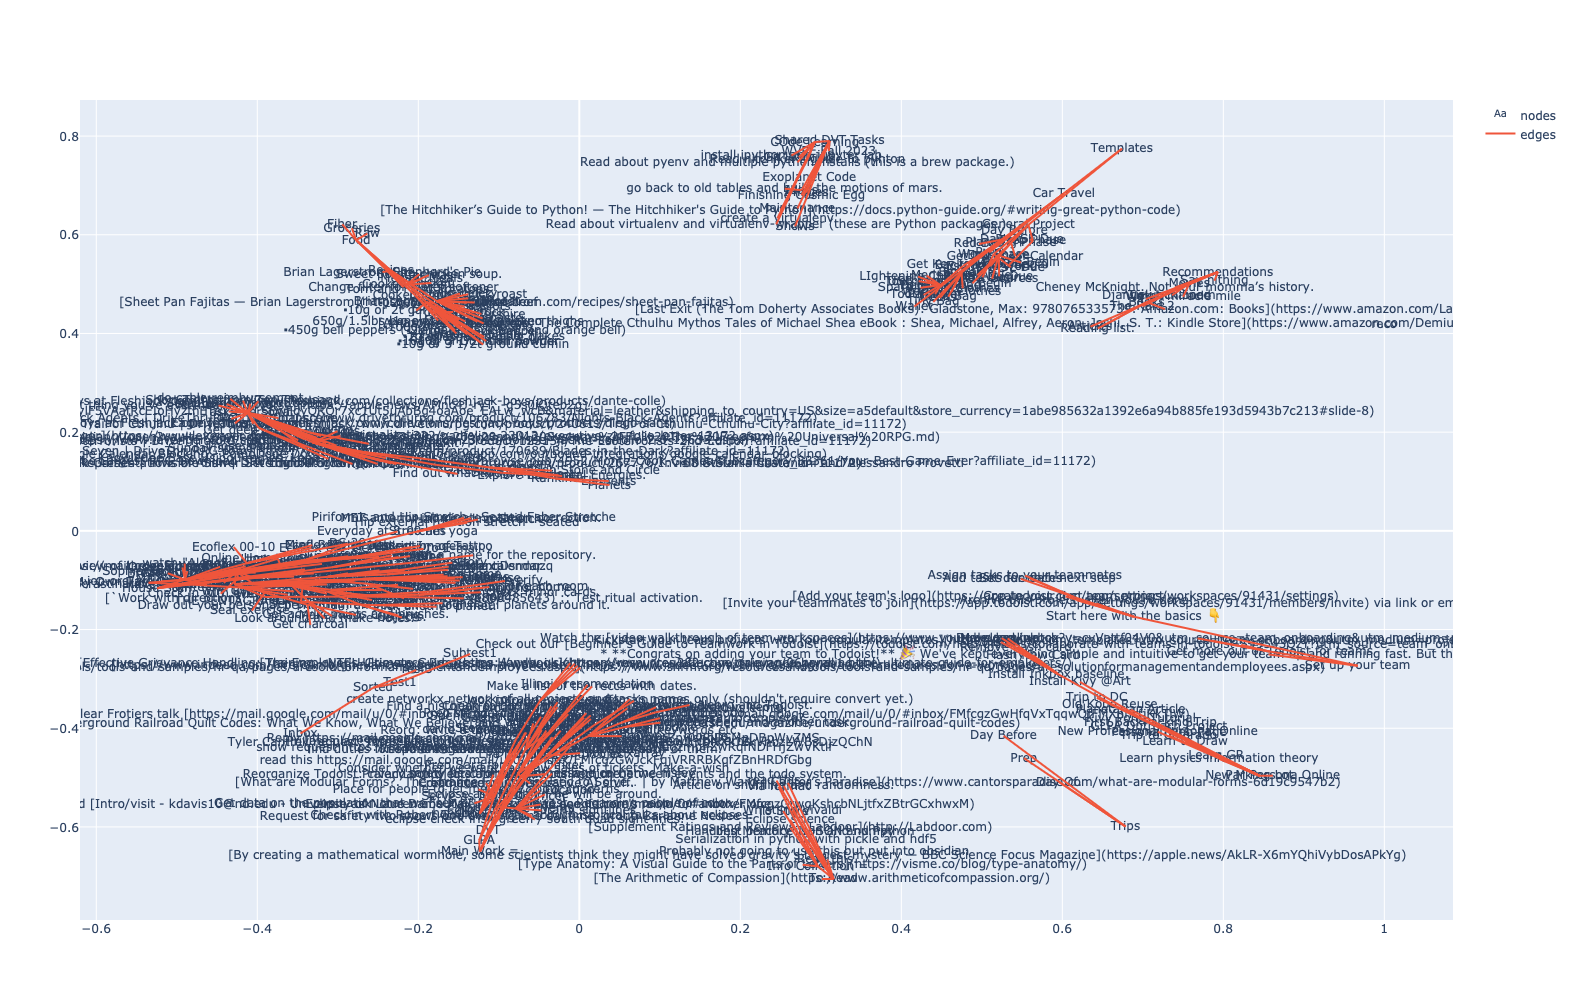

In [61]:
labels = []
for n in tdg.nodes:
    try:
        labels.append(tdg.nodes[n]["obj"].content)
    except AttributeError:
        labels.append(tdg.nodes[n]["obj"].name)

fig = go.Figure()
for name in traces:
    fig.add_trace(traces[name])
fig.update_traces(selector={"name": "nodes"}, mode="text", text=labels)
fig.update_layout(dict(height=1000))
#print(fig)

In [9]:
def gfilter_factory(G, attr, value):
    def filter(node):
        try:
            if G.nodes[node][attr] == value:
                return True
            else:
                return False
        except KeyError:
            try:
                if getattr(G.nodes[node], attr) == Value:
                    return True
                else:
                    return False
            except AttributeError:
                return False
        return False
    return filter

filter = gfilter_factory(tdg, "parent_id", "377018486")
        

children_of_test = nx.subgraph_view(tdg, filter)

In [10]:
ttasks = tdapi.get_tasks(filter="search: test")

In [11]:
for task in ttasks:
    print(task.id, task.content)

5866991843 [`Work with directions.`](https://todoist.com/showTask?id=5866485643) :: Test ritual activation.

7033649749 Fix rune tests

7598008484 whichtest

7598008713 test

7598085640 [`test`](https://todoist.com/showTask?id=7598008713) :: subsubtest

7598086897 [`whichtest`](https://todoist.com/showTask?id=7598008484) :: subtest2

In [20]:
args = manage_supertask_links(tdapi, ttasks, update=False)

In [21]:
args

[None,
 None,
 None,
 None,
 None,
 {'content': '[`whichtest`](https://todoist.com/showTask?id=7598008484) :: subtest2'}]

In [37]:
n = list(tdg.nodes)[0]
g = nx.subgraph(tdg,tdg.pred[n])
tdg.subgraph(tdg.pred[n])

In [73]:
sg = nx.subgraph_view(tdg, filter_edge=tbd._richTree_filter_factory(tdg))
#sg = sg.subgraph(sg.succ[n])
n = list(sg)[0]
#print(n)
#print(sg.nodes[list(sg)[0]]["obj"])
#print(sg.pred[n])
traces = nxu.graph_to_traces(g, layout_func=nx.spring_layout)
labels = []
for n in g.nodes:
    try:
        labels.append(g.nodes[n]["obj"].content)
    except AttributeError:
        labels.append(g.nodes[n]["obj"].name)

fig = go.Figure()
for name in traces:
    fig.add_trace(traces[name])
fig.update_traces(selector={"name": "nodes"}, mode="text", text=labels)
fig.update_layout(dict(height=1000))
#print(fig)

{}

ValueError: shape mismatch: value array of shape (2,) could not be broadcast to indexing result of shape (0,)

In [1]:
type(False)

bool

In [2]:
False == 1 

False

In [14]:
a = list(range(10))

In [4]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
del a[1]

In [6]:
a

[0, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
getattr(a, None)

TypeError: attribute name must be string, not 'NoneType'

In [16]:
getattr(a, "test")

AttributeError: 'list' object has no attribute 'test'

In [18]:
one = 1
one["test"] = "teat"

TypeError: 'int' object does not support item assignment

In [19]:
a,b,c = (1,2)

ValueError: not enough values to unpack (expected 3, got 2)

In [20]:
None is not False

True